In [ ]:
!pip install split-folders

In [1]:
import kagglehub
import shutil
import random
import tensorflow as tf
import zipfile, os
import splitfolders
import numpy as np
import matplotlib.pyplot as plt
import keras
from ipywidgets import widgets
from io import BytesIO

In [ ]:
# Download latest version
path = kagglehub.dataset_download("marquis03/plants-classification")

print("Path to dataset files:", path)

100%|██████████| 1.34G/1.34G [00:20<00:00, 69.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/marquis03/plants-classification/versions/1


In [ ]:
shutil.move("/root/.cache/kagglehub/datasets/marquis03/plants-classification/versions/1", os.getcwd())
os.rename("1", "data")

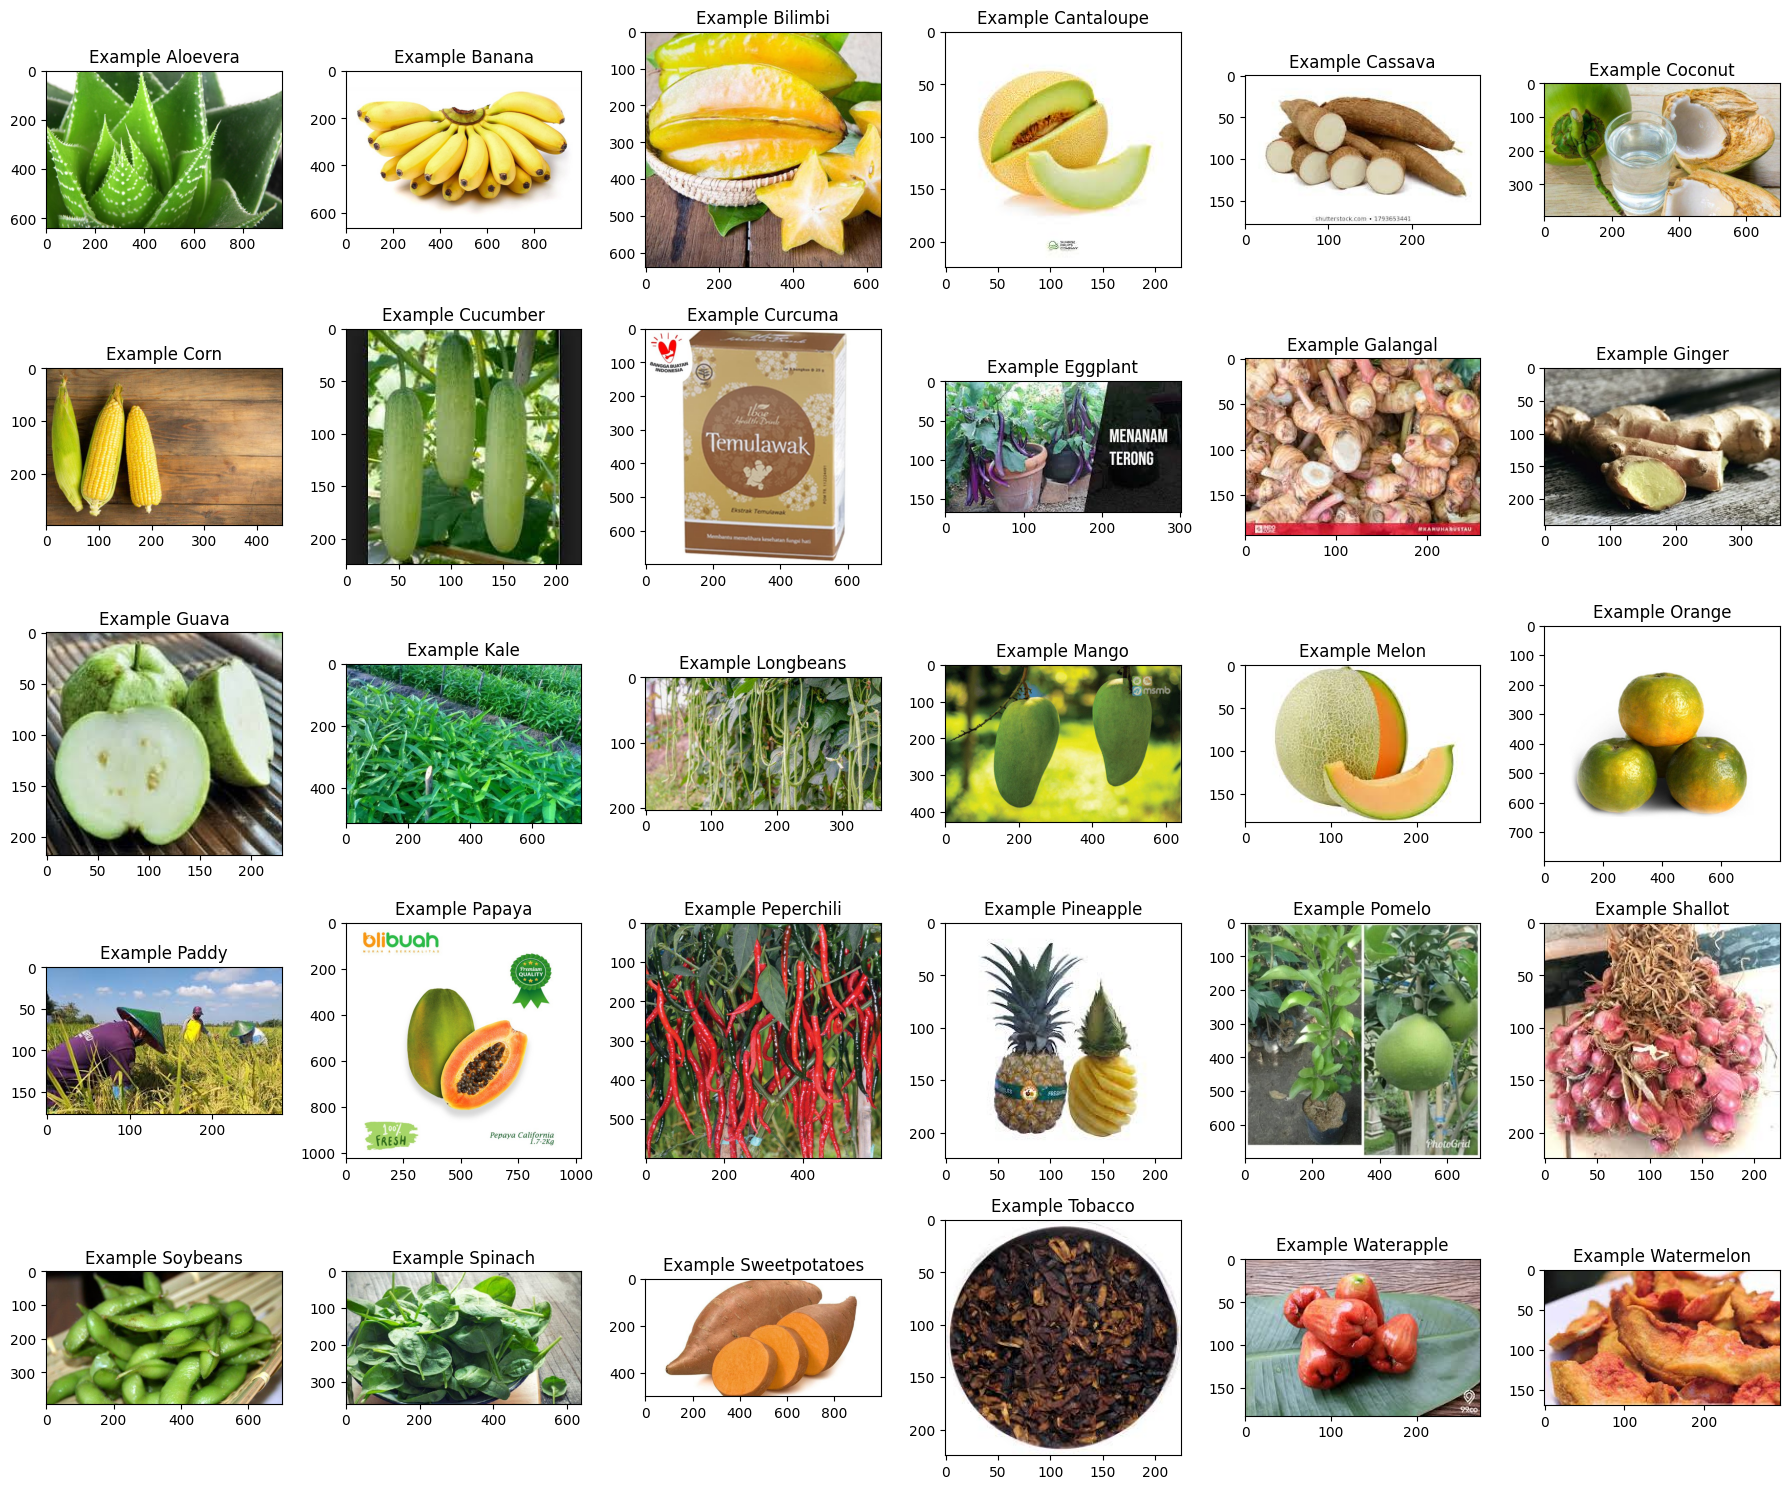

In [2]:
BASE_DIR = "PlantsDataset/train"

aloevera_dir = os.path.join(BASE_DIR, "aloevera/")
banana_dir = os.path.join(BASE_DIR, "banana/")
bilimbi_dir = os.path.join(BASE_DIR, "bilimbi/")
cantaloupe_dir = os.path.join(BASE_DIR, "cantaloupe/")
cassava_dir = os.path.join(BASE_DIR, "cassava/")
coconut_dir = os.path.join(BASE_DIR, "coconut/")
corn_dir = os.path.join(BASE_DIR, "corn/")
cucumber_dir = os.path.join(BASE_DIR, "cucumber/")
curcuma_dir = os.path.join(BASE_DIR, "curcuma/")
eggplant_dir = os.path.join(BASE_DIR, "eggplant/")
galangal_dir = os.path.join(BASE_DIR, "galangal/")
ginger_dir = os.path.join(BASE_DIR, "ginger/")
guava_dir = os.path.join(BASE_DIR, "guava/")
kale_dir = os.path.join(BASE_DIR, "kale/")
longbeans_dir = os.path.join(BASE_DIR, "longbeans/")
mango_dir = os.path.join(BASE_DIR, "mango/")
melon_dir = os.path.join(BASE_DIR, "melon/")
orange_dir = os.path.join(BASE_DIR, "orange/")
paddy_dir = os.path.join(BASE_DIR, "paddy/")
papaya_dir = os.path.join(BASE_DIR, "papaya/")
peperchili_dir = os.path.join(BASE_DIR, "peperchili/")
pineapple_dir = os.path.join(BASE_DIR, "pineapple/")
pomelo_dir = os.path.join(BASE_DIR, "pomelo/")
shallot_dir = os.path.join(BASE_DIR, "shallot/")
soybeans_dir = os.path.join(BASE_DIR, "soybeans/")
spinach_dir = os.path.join(BASE_DIR, "spinach/")
sweetpotatoes_dir = os.path.join(BASE_DIR, "sweetpotatoes/")
tobacco_dir = os.path.join(BASE_DIR, "tobacco/")
waterapple_dir = os.path.join(BASE_DIR, "waterapple/")
watermelon_dir = os.path.join(BASE_DIR, "watermelon/")

# Set up grid 5x6
fig, axs = plt.subplots(5, 6, figsize=(18, 15))
axs[0, 0].imshow(keras.utils.load_img(f"{os.path.join(aloevera_dir, os.listdir(aloevera_dir)[0])}"))
axs[0, 0].set_title("Example Aloevera")
axs[0, 1].imshow(keras.utils.load_img(f"{os.path.join(banana_dir, os.listdir(banana_dir)[0])}"))
axs[0, 1].set_title("Example Banana")
axs[0, 2].imshow(keras.utils.load_img(f"{os.path.join(bilimbi_dir, os.listdir(bilimbi_dir)[0])}"))
axs[0, 2].set_title("Example Bilimbi")
axs[0, 3].imshow(keras.utils.load_img(f"{os.path.join(cantaloupe_dir, os.listdir(cantaloupe_dir)[0])}"))
axs[0, 3].set_title("Example Cantaloupe")
axs[0, 4].imshow(keras.utils.load_img(f"{os.path.join(cassava_dir, os.listdir(cassava_dir)[0])}"))
axs[0, 4].set_title("Example Cassava")
axs[0, 5].imshow(keras.utils.load_img(f"{os.path.join(coconut_dir, os.listdir(coconut_dir)[0])}"))
axs[0, 5].set_title("Example Coconut")
axs[1, 0].imshow(keras.utils.load_img(f"{os.path.join(corn_dir, os.listdir(corn_dir)[0])}"))
axs[1, 0].set_title("Example Corn")
axs[1, 1].imshow(keras.utils.load_img(f"{os.path.join(cucumber_dir, os.listdir(cucumber_dir)[0])}"))
axs[1, 1].set_title("Example Cucumber")
axs[1, 2].imshow(keras.utils.load_img(f"{os.path.join(curcuma_dir, os.listdir(curcuma_dir)[0])}"))
axs[1, 2].set_title("Example Curcuma")
axs[1, 3].imshow(keras.utils.load_img(f"{os.path.join(eggplant_dir, os.listdir(eggplant_dir)[0])}"))
axs[1, 3].set_title("Example Eggplant")
axs[1, 4].imshow(keras.utils.load_img(f"{os.path.join(galangal_dir, os.listdir(galangal_dir)[0])}"))
axs[1, 4].set_title("Example Galangal")
axs[1, 5].imshow(keras.utils.load_img(f"{os.path.join(ginger_dir, os.listdir(ginger_dir)[0])}"))
axs[1, 5].set_title("Example Ginger")
axs[2, 0].imshow(keras.utils.load_img(f"{os.path.join(guava_dir, os.listdir(guava_dir)[0])}"))
axs[2, 0].set_title("Example Guava")
axs[2, 1].imshow(keras.utils.load_img(f"{os.path.join(kale_dir, os.listdir(kale_dir)[0])}"))
axs[2, 1].set_title("Example Kale")
axs[2, 2].imshow(keras.utils.load_img(f"{os.path.join(longbeans_dir, os.listdir(longbeans_dir)[0])}"))
axs[2, 2].set_title("Example Longbeans")
axs[2, 3].imshow(keras.utils.load_img(f"{os.path.join(mango_dir, os.listdir(mango_dir)[0])}"))
axs[2, 3].set_title("Example Mango")
axs[2, 4].imshow(keras.utils.load_img(f"{os.path.join(melon_dir, os.listdir(melon_dir)[0])}"))
axs[2, 4].set_title("Example Melon")
axs[2, 5].imshow(keras.utils.load_img(f"{os.path.join(orange_dir, os.listdir(orange_dir)[0])}"))
axs[2, 5].set_title("Example Orange")
axs[3, 0].imshow(keras.utils.load_img(f"{os.path.join(paddy_dir, os.listdir(paddy_dir)[0])}"))
axs[3, 0].set_title("Example Paddy")
axs[3, 1].imshow(keras.utils.load_img(f"{os.path.join(papaya_dir, os.listdir(papaya_dir)[0])}"))
axs[3, 1].set_title("Example Papaya")
axs[3, 2].imshow(keras.utils.load_img(f"{os.path.join(peperchili_dir, os.listdir(peperchili_dir)[0])}"))
axs[3, 2].set_title("Example Peperchili")
axs[3, 3].imshow(keras.utils.load_img(f"{os.path.join(pineapple_dir, os.listdir(pineapple_dir)[0])}"))
axs[3, 3].set_title("Example Pineapple")
axs[3, 4].imshow(keras.utils.load_img(f"{os.path.join(pomelo_dir, os.listdir(pomelo_dir)[0])}"))
axs[3, 4].set_title("Example Pomelo")
axs[3, 5].imshow(keras.utils.load_img(f"{os.path.join(shallot_dir, os.listdir(shallot_dir)[0])}"))
axs[3, 5].set_title("Example Shallot")
axs[4, 0].imshow(keras.utils.load_img(f"{os.path.join(soybeans_dir, os.listdir(soybeans_dir)[0])}"))
axs[4, 0].set_title("Example Soybeans")
axs[4, 1].imshow(keras.utils.load_img(f"{os.path.join(spinach_dir, os.listdir(spinach_dir)[0])}"))
axs[4, 1].set_title("Example Spinach")
axs[4, 2].imshow(keras.utils.load_img(f"{os.path.join(sweetpotatoes_dir, os.listdir(sweetpotatoes_dir)[0])}"))
axs[4, 2].set_title("Example Sweetpotatoes")
axs[4, 3].imshow(keras.utils.load_img(f"{os.path.join(tobacco_dir, os.listdir(tobacco_dir)[0])}"))
axs[4, 3].set_title("Example Tobacco")
axs[4, 4].imshow(keras.utils.load_img(f"{os.path.join(waterapple_dir, os.listdir(waterapple_dir)[0])}"))
axs[4, 4].set_title("Example Waterapple")
axs[4, 5].imshow(keras.utils.load_img(f"{os.path.join(watermelon_dir, os.listdir(watermelon_dir)[0])}"))
axs[4, 5].set_title("Example Watermelon")

# Atur layout
plt.tight_layout()
plt.show()

In [5]:
# Pilih kategori yang diinginkan
category = "aloevera"
category_dir = os.path.join(BASE_DIR, category)

# Memuat gambar contoh
sample_image = keras.utils.load_img(os.path.join(category_dir, os.listdir(category_dir)[0]))
sample_array = keras.utils.img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")
print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (640, 960, 3)
The maximum pixel value used is: 255.0


In [6]:
class EarlyStoppingCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs["accuracy"] >= 0.999:
            self.model.stop_training = True
            print("\nReached 99.9% accuracy")

In [7]:
train_data = keras.utils.image_dataset_from_directory(
    directory=BASE_DIR,
    image_size=(244, 244),
    batch_size=32,
    label_mode="categorical"
)

for images, labels, in train_data.take(1):
    print(f"Range for pixel values: {np.min(images[0]), np.max(images[0])}")

print(f"train_data is an instance of tf.data.Dataset: {isinstance(train_data, tf.data.Dataset)}")

Found 21000 files belonging to 30 classes.
Range for pixel values: (np.float32(0.0), np.float32(255.0))
train_data is an instance of tf.data.Dataset: True


In [8]:
model = keras.models.Sequential([
    keras.Input(shape=(244, 244, 3)),
    keras.layers.Rescaling(1./255),

    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),

    keras.layers.Dense(30, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 242, 242, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 121, 121, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 119, 119, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,888,638 (98.76 MB)

 Trainable params: 25,888,638 (98.76 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [11]:
training_history = model.fit(
	  x=train_data,
    epochs=20,
    callbacks=[EarlyStoppingCallback()]
)

Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 307s 467ms/step - accuracy: 0.3765 - loss: 2.0783
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 305s 464ms/step - accuracy: 0.5904 - loss: 1.3355
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 305s 464ms/step - accuracy: 0.7933 - loss: 0.6463
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 305s 465ms/step - accuracy: 0.8867 - loss: 0.3194
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 305s 464ms/step - accuracy: 0.9214 - loss: 0.2162
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 309s 470ms/step - accuracy: 0.9285 - loss: 0.1767
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 315s 480ms/step - accuracy: 0.9378 - loss: 0.1550
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 320s 486ms/step - accuracy: 0.9497 - loss: 0.1154
Epoch 9/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 314s 478ms/step - accuracy: 0.9385 - loss: 0.1523
Epoch 10/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 315s 479ms/step - accuracy: 0.9493 - loss: 0.1205
Epoch 11/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 308s 469ms/step - accuracy: 0.9479 - loss: 0.1175
Epoch 12

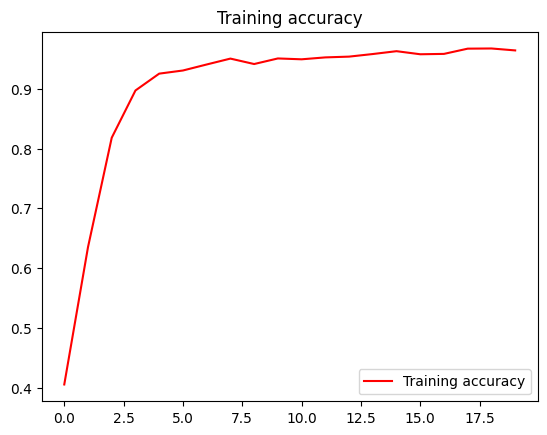

In [12]:
acc = training_history.history['accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.show()

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = keras.preprocessing.image.load_img(path, target_size=(244, 244))

  imgplot = plt.imshow(img)
  x = keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=32)
  print(fn)
  predict = np.argmax(classes[0])

  predicted_class = categories[predict]
  print(predicted_class)

In [ ]:
model.save('model.keras')

In [15]:
class_labels = [
    "Aloevera", "Banana", "Bilimbi", "Cantaloupe", "Cassava",
    "Coconut", "Corn", "Cucumber", "Curcuma", "Eggplant",
    "Galangal", "Ginger", "Guava", "Kale", "Longbeans",
    "Mango", "Melon", "Orange", "Paddy", "Papaya",
    "Peperchili", "Pineapple", "Pomelo", "Shallot", "Soybeans",
    "Spinach", "Sweetpotatoes", "Tobacco", "Waterapple", "Watermelon"
]

# Nilai numerik sesuai dengan kelas
numerical_values = list(range(len(class_labels)))  # [0, 1, 2, ..., 29]

# Buat mapping kelas
class_mapping = np.array([class_labels, numerical_values])

# Simpan mapping kelas ke file
np.save('class_mapping.npy', class_mapping)